In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('market_data.xlsx')

In [3]:
df.head(4)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(522064, 7)

In [5]:
# checking for duplicate values
df.duplicated().sum()

5286

In [6]:
# dropping the duplicate values from the datasets
df.drop_duplicates(inplace=True)

In [7]:
# checking for null values from the datasets 
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    133967
Country            0
dtype: int64

In [8]:
# Extracting dates and time from date column and created individual columns for day, month, year, hour and minute
df['Day'] = pd.to_datetime(df.Date).dt.day
df['Month'] = pd.to_datetime(df.Date).dt.month
df['Year'] = pd.to_datetime(df.Date).dt.year
df['Hour'] = pd.to_datetime(df.Date).dt.hour
df['Minute'] = pd.to_datetime(df.Date).dt.minute

In [9]:
# adding new column named "Sales" in the dataframe
df['Sales'] = df['Quantity']*df['Price']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516778 entries, 0 to 522063
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      516778 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    516778 non-null  int64         
 3   Date        516778 non-null  datetime64[ns]
 4   Price       516778 non-null  float64       
 5   CustomerID  382811 non-null  float64       
 6   Country     516778 non-null  object        
 7   Day         516778 non-null  int64         
 8   Month       516778 non-null  int64         
 9   Year        516778 non-null  int64         
 10  Hour        516778 non-null  int64         
 11  Minute      516778 non-null  int64         
 12  Sales       516778 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 55.2+ MB


In [11]:
# Dropping date columns from the df
df = df.drop(columns=['Date'], axis=1)

In [12]:
df.head(2)

,BillNo,Itemname,Quantity,Price,CustomerID,Country,Day,Month,Year,Hour,Minute,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,8,26,15.30
1,536365,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,8,26,20.34


# 50 Biggest Bills by Sales Amount

In [13]:
Top50_bills = df.groupby(['BillNo'])['Sales'].sum().sort_values(ascending=False).head(50)

In [14]:
Top50_bills

BillNo
581483     168469.60
541431      77183.60
574941      52940.94
576365      50653.91
556444      38970.00
567423      31698.16
556917      22775.93
572209      22206.00
567381      22104.80
563614      21880.44
548203      21627.72
550461      21535.90
572035      20277.92
563076      19150.66
562439      18841.48
539750      18745.86
573585      16874.58
545475      16726.84
562955      16677.26
556255      16488.00
537659      15885.49
548011      15719.56
569650      15643.77
540815      15160.90
552883      14415.74
543989      14022.92
569570      13760.02
537632      13541.33
558526      13355.40
566934      13249.94
563590      13031.50
540689      12797.52
538877      12681.58
538351      12633.67
562789      12341.21
544479      11956.10
553546      11924.80
537640      11540.34
547708      11343.20
A563185     11062.06
555920      10999.52
569815      10992.96
581175      10901.54
536982      10661.69
578305      10584.77
541206      10389.06
581457      10363.82
561633

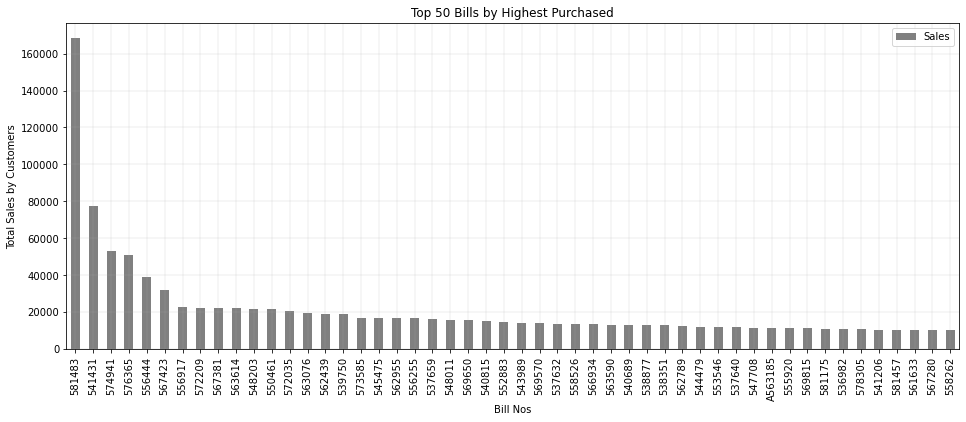

In [15]:
plotdata = pd.DataFrame(Top50_bills)
plotdata.plot(kind="bar", figsize=(16,6), color='grey')
plt.xlabel("Bill Nos")
plt.ylabel("Total Sales by Customers")
plt.title("Top 50 Bills by Highest Purchased")
plt.grid(linewidth=0.2)
plt.show()

# Quantity Wise data 

In [16]:
quantity_df = df.groupby(['Itemname'])['Quantity'].sum().sort_values(ascending=False).reset_index()
print(quantity_df)

                                Itemname  Quantity
0            PAPER CRAFT , LITTLE BIRDIE     80995
1         MEDIUM CERAMIC TOP STORAGE JAR     77553
2      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53703
3                JUMBO BAG RED RETROSPOT     47899
4     WHITE HANGING HEART T-LIGHT HOLDER     36508
...                                  ...       ...
4180                             Damaged     -7540
4181        Printing smudges/thrown away     -9058
4182                               check    -12030
4183              Unsaleable, destroyed.    -15644
4184        printing smudges/thrown away    -19200

[4185 rows x 2 columns]


In [17]:
df['Itemname'].unique().shape

(4186,)

In [18]:
quantity = quantity_df['Quantity'].sum()
print(quantity)

5265750


In [19]:
quantity_sold = quantity_df[quantity_df['Quantity'] >0 ]

In [20]:
# Finding the actual quantity sold 
actual_qty = quantity_sold['Quantity'].sum()
print(actual_qty)

5414422


In [21]:
quantity_sold['Per_qty'] = (quantity_sold['Quantity']/actual_qty)*100

C:\Users\mv260\AppData\Local\Temp/ipykernel_11564/2517049206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity_sold['Per_qty'] = (quantity_sold['Quantity']/actual_qty)*100


In [22]:
# top 20 sold items
top20_quantity_sold = quantity_sold.head(20)
print(top20_quantity_sold)

                              Itemname  Quantity   Per_qty
0          PAPER CRAFT , LITTLE BIRDIE     80995  1.495912
1       MEDIUM CERAMIC TOP STORAGE JAR     77553  1.432341
2    WORLD WAR 2 GLIDERS ASSTD DESIGNS     53703  0.991851
3              JUMBO BAG RED RETROSPOT     47899  0.884656
4   WHITE HANGING HEART T-LIGHT HOLDER     36508  0.674273
5        ASSORTED COLOUR BIRD ORNAMENT     35986  0.664632
6                       POPCORN HOLDER     35589  0.657300
7      PACK OF 72 RETROSPOT CAKE CASES     34380  0.634971
8                   RABBIT NIGHT LIGHT     30469  0.562738
9            PACK OF 12 LONDON TISSUES     26227  0.484392
10              MINI PAINT SET VINTAGE     25805  0.476598
11     VICTORIAN GLASS HANGING T-LIGHT     24041  0.444018
12           ASSORTED COLOURS SILK FAN     23766  0.438939
13  PACK OF 60 PINK PAISLEY CAKE CASES     23260  0.429593
14                  BROCADE RING PURSE     23020  0.425161
15             JUMBO BAG PINK POLKADOT     21128  0.3902

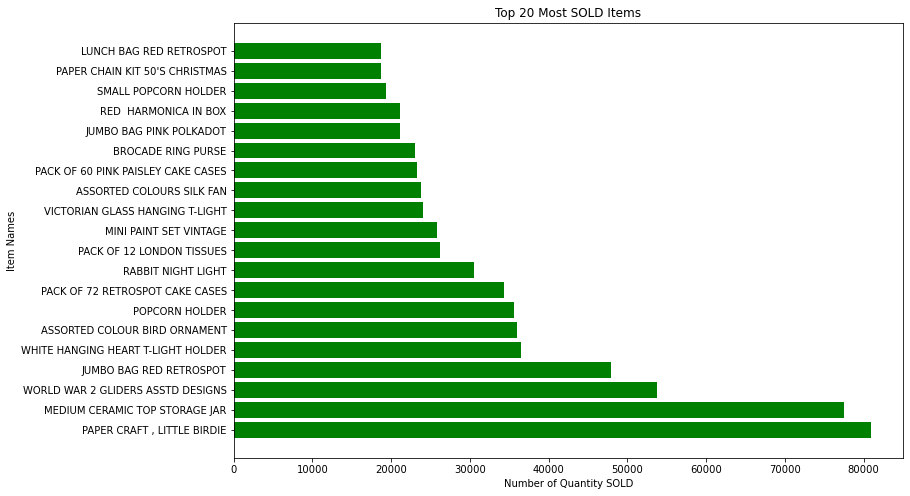

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
plt.barh(top20_quantity_sold['Itemname'],top20_quantity_sold['Quantity'], color='green')
plt.xlabel("Number of Quantity SOLD")
plt.ylabel("Item Names")
plt.title("Top 20 Most SOLD Items")
plt.show()

# Price Wise Data

In [24]:
price_df = df[['Itemname','Quantity','Price']].sort_values(by='Price', ascending=False)

In [25]:
price_df =price_df.groupby(['Itemname'])['Price','Quantity'].sum().sort_values(by='Price', ascending=False).reset_index()  

C:\Users\mv260\AppData\Local\Temp/ipykernel_11564/1787417522.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_df =price_df.groupby(['Itemname'])['Price','Quantity'].sum().sort_values(by='Price', ascending=False).reset_index()


In [26]:
price_df

,Itemname,Price,Quantity
0,DOTCOM POSTAGE,206248.77,708
1,Manual,66162.33,6982
2,POSTAGE,32674.29,3002
3,REGENCY CAKESTAND 3 TIER,26990.71,13095
4,AMAZON FEE,13761.09,2
...,...,...,...
4180,DAMAGED,0.00,-1
4181,add stock to allocate online orders,0.00,2
4182,adjust,0.00,-53
4183,wrongly sold sets,0.00,-975


In [27]:
price_df['Qty_Price'] = price_df['Price']/price_df['Quantity']

In [28]:
price_df = price_df.sort_values(by=['Qty_Price'], ascending=False)

In [29]:
price_df

,Itemname,Price,Quantity,Qty_Price
4,AMAZON FEE,13761.09,2,6880.545000
0,DOTCOM POSTAGE,206248.77,708,291.311822
63,RUSTIC SEVENTEEN DRAWER SIDEBOARD,3655.00,30,121.833333
107,VINTAGE BLUE KITCHEN CABINET,2685.00,24,111.875000
401,REGENCY MIRROR WITH SHUTTERS,1095.00,10,109.500000
...,...,...,...,...
4067,wrongly sold (22719) barcode,0.00,170,0.000000
4068,wrongly sold as sets,0.00,-600,-0.000000
4069,water damaged,0.00,-15,-0.000000
4184,Adjust bad debt,-11062.06,3,-3687.353333


In [30]:
# Now we will drop the row number 0 and 4 from the df because we are not sure does this is an item sold by seller or not.
price_df.drop([0,4], inplace=True)

In [31]:
# lets find out the most 20 high priced items
top20_priced_item = price_df.head(20)

In [32]:
top20_priced_item

,Itemname,Price,Quantity,Qty_Price
63,RUSTIC SEVENTEEN DRAWER SIDEBOARD,3655.00,30,121.833333
107,VINTAGE BLUE KITCHEN CABINET,2685.00,24,111.875000
401,REGENCY MIRROR WITH SHUTTERS,1095.00,10,109.500000
23,VINTAGE RED KITCHEN CABINET,5200.00,58,89.655172
2384,Dotcomgiftshop Gift Voucher Â£100.00,83.33,1,83.330000
32,LOVE SEAT ANTIQUE WHITE METAL,4590.00,56,81.964286
269,CHEST NATURAL WOOD 20 DRAWERS,1535.00,24,63.958333
1212,DECORATIVE HANGING SHELVING UNIT,299.75,6,49.958333
246,CARRIAGE,1643.00,33,49.787879
604,SCHOOL DESK AND CHAIR,765.90,18,42.550000


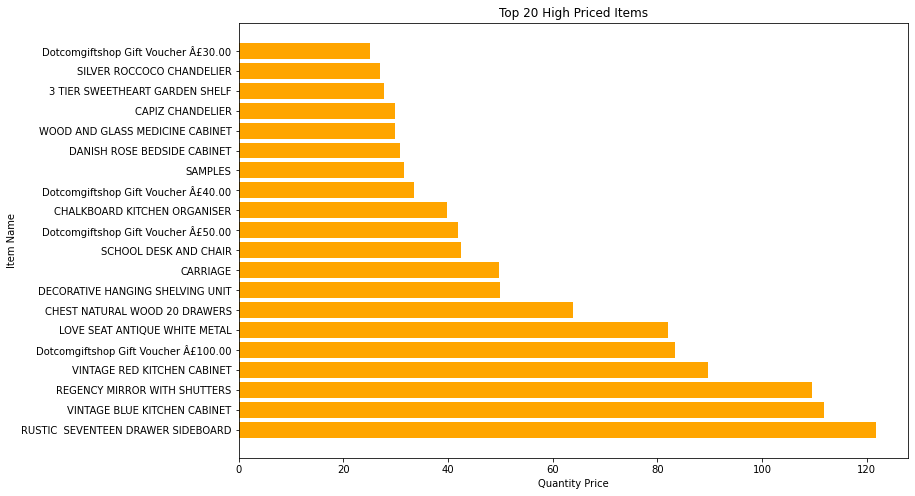

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
plt.barh(top20_priced_item['Itemname'], top20_priced_item['Qty_Price'], color='Orange')
plt.xlabel("Quantity Price")
plt.ylabel("Item Name")
plt.title("Top 20 High Priced Items")
plt.show()

# Customer Wise Data

In [34]:
customer_df = df.groupby(['CustomerID'])['Quantity','Price','Day','Month','Year','Hour','Sales'].sum()

C:\Users\mv260\AppData\Local\Temp/ipykernel_11564/2503279841.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_df = df.groupby(['CustomerID'])['Quantity','Price','Day','Month','Year','Hour','Sales'].sum()


In [35]:
customer_df

,Quantity,Price,Day,Month,Year,Hour,Sales
CustomerID,,,,,,,
12346.0,74215,1.04,18,1,2011,10,77183.60
12347.0,2458,481.21,2879,1383,365971,2219,4310.00
12349.0,631,605.10,1533,803,146803,657,1757.55
12350.0,197,65.30,34,34,34187,272,334.40
12352.0,536,1354.11,1340,552,170935,1193,2506.04
...,...,...,...,...,...,...,...
18280.0,45,47.65,70,30,20110,90,180.60
18281.0,54,39.36,84,42,14077,70,80.82
18282.0,103,62.39,45,116,24132,146,178.05


            Quantity     Price     Day  Month      Year    Hour      Sales
CustomerID                                                                
14646.0       197491   5176.09   35872  14191   4182810   24488  280206.02
18102.0        64124   1940.92    4837   3746    866723    5587  259657.30
17450.0        69973   1135.32    5870   2284    675693    4121  194390.79
16446.0        80997      4.98      45     22      6033      27  168472.50
12415.0        77670   2097.08    8943   4254   1439876    8061  124914.53
17511.0        64549   2221.28   11598   7215   1936505   11320   91062.38
16029.0        40108   8720.65    3453   1769    484619    2776   80850.84
12346.0        74215      1.04      18      1      2011      10   77183.60
16684.0        50255    679.10    3291   2086    557024    3201   66653.56
14096.0        16352  33332.45   90948  53171  10278221   73542   65164.79
13694.0        63312    891.19    8957   3695   1142202    7010   65039.62
15311.0        38147   59

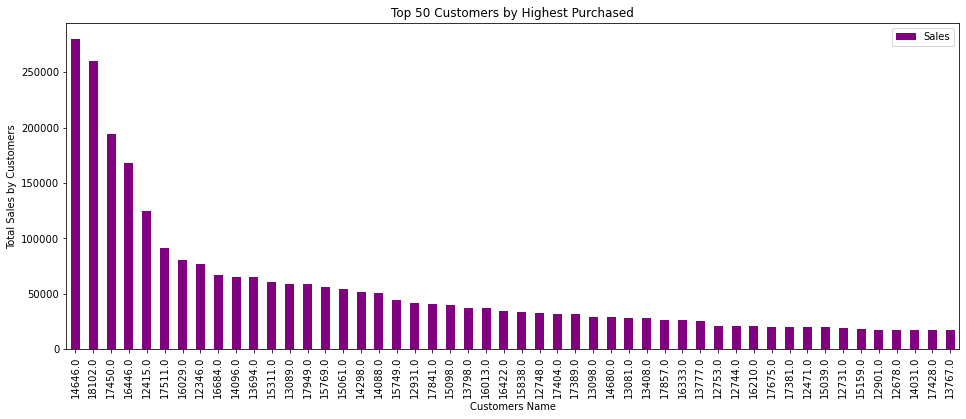

In [36]:
Top50_customers = customer_df.sort_values(by='Sales', ascending=False).head(50)
print(Top50_customers)

plotdata = pd.DataFrame(Top50_customers["Sales"])
plotdata.plot(kind="bar", figsize=(16,6), color='purple')
plt.xlabel("Customers Name")
plt.ylabel("Total Sales by Customers")
plt.title("Top 50 Customers by Highest Purchased")
plt.show()

            Quantity     Price     Day  Month      Year    Hour      Sales
CustomerID                                                                
14646.0       197491   5176.09   35872  14191   4182810   24488  280206.02
16446.0        80997      4.98      45     22      6033      27  168472.50
12415.0        77670   2097.08    8943   4254   1439876    8061  124914.53
12346.0        74215      1.04      18      1      2011      10   77183.60
17450.0        69973   1135.32    5870   2284    675693    4121  194390.79
17511.0        64549   2221.28   11598   7215   1936505   11320   91062.38
18102.0        64124   1940.92    4837   3746    866723    5587  259657.30
13694.0        63312    891.19    8957   3695   1142202    7010   65039.62
14298.0        58283   2451.35   26245  10948   3287841   20102   51502.10
16684.0        50255    679.10    3291   2086    557024    3201   66653.56
16029.0        40108   8720.65    3453   1769    484619    2776   80850.84
15311.0        38147   59

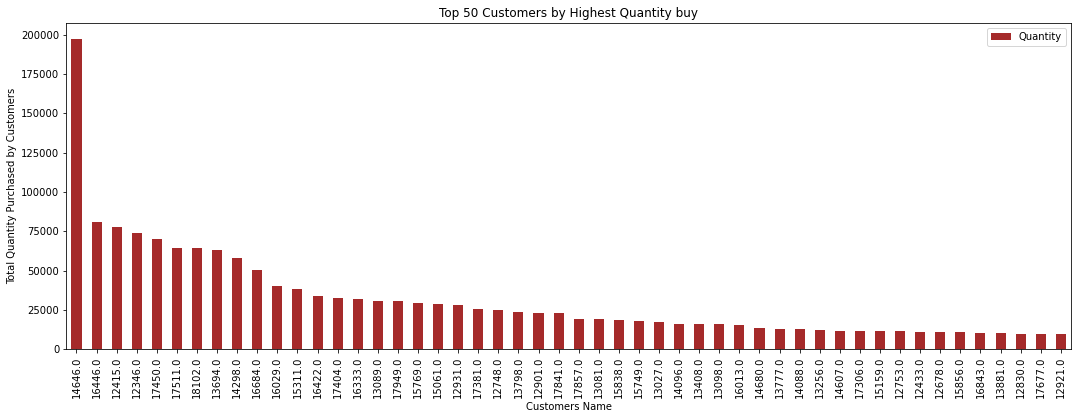

In [37]:
Top50_qty_buyers = customer_df.sort_values(by='Quantity', ascending=False).head(50)
print(Top50_qty_buyers)

plotdata = pd.DataFrame(Top50_qty_buyers['Quantity'])
plotdata.plot(kind='bar', figsize=(18,6), color='brown')
plt.xlabel("Customers Name")
plt.ylabel("Total Quantity Purchased by Customers")
plt.title("Top 50 Customers by Highest Quantity buy")
plt.show()

            Quantity     Price     Day  Month      Year    Hour      Sales
CustomerID                                                                
14096.0        16352  33332.45   90948  53171  10278221   73542   65164.79
17841.0        22830  19465.43  117419  61095  15430117  101509   40509.84
12744.0         5241  12949.99    3516   1149    446442    2608   21279.29
12748.0        25288  11788.31   66768  41117   8873891   59565   33053.19
12536.0         2803   9070.93    2903   2610    524871    3654   12601.83
16029.0        40108   8720.65    3453   1769    484619    2776   80850.84
14606.0         6187   7535.19   39602  17625   5383221   34159   12076.15
15311.0        38147   5939.21   31746  15370   4757851   30398   60632.75
14527.0         2088   5206.01   15254   7249   1952576   11929    8507.13
14646.0       197491   5176.09   35872  14191   4182810   24488  280206.02
13089.0        31025   4966.65   25293  11372   3647868   22539   58762.08
15039.0         9131   47

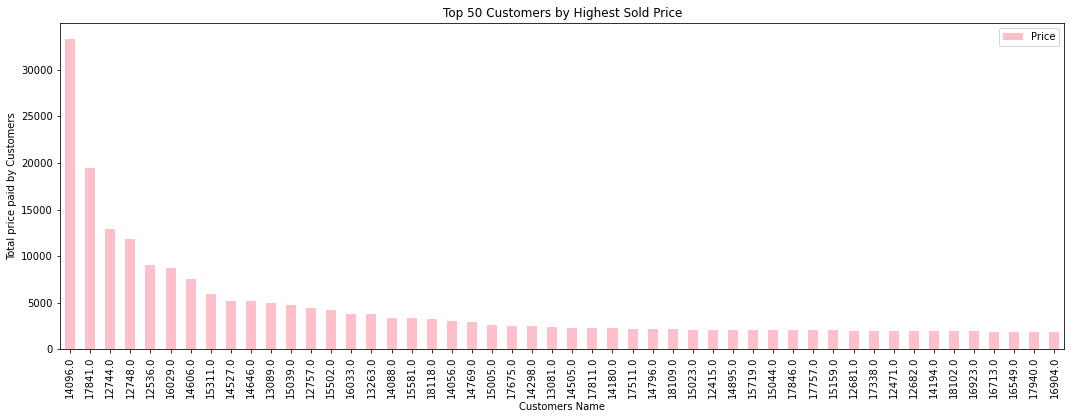

In [38]:
Top50_price_pc = customer_df.sort_values(by='Price', ascending=False).head(50)
print(Top50_price_pc)

plotdata = pd.DataFrame(Top50_price_pc['Price'])
plotdata.plot(kind='bar', figsize=(18,6), color='pink')
plt.xlabel("Customers Name")
plt.ylabel("Total price paid by Customers")
plt.title("Top 50 Customers by Highest Sold Price")
plt.show()

                 Country  CustomerID
0         United Kingdom      349186
1                Germany        9027
2                 France        8327
3                  Spain        2480
4            Netherlands        2363
5                Belgium        2031
6            Switzerland        1842
7               Portugal        1453
8              Australia        1184
9                 Norway        1072
10                 Italy         758
11                Sweden         450
12               Austria         398
13                Poland         330
14                 Japan         321
15                Israel         244
16           Unspecified         241
17             Singapore         222
18               Iceland         182
19                   USA         179
20                Greece         145
21                 Malta         112
22  United Arab Emirates          68
23                   RSA          58
24               Lebanon          45
25             Lithuania          35
2

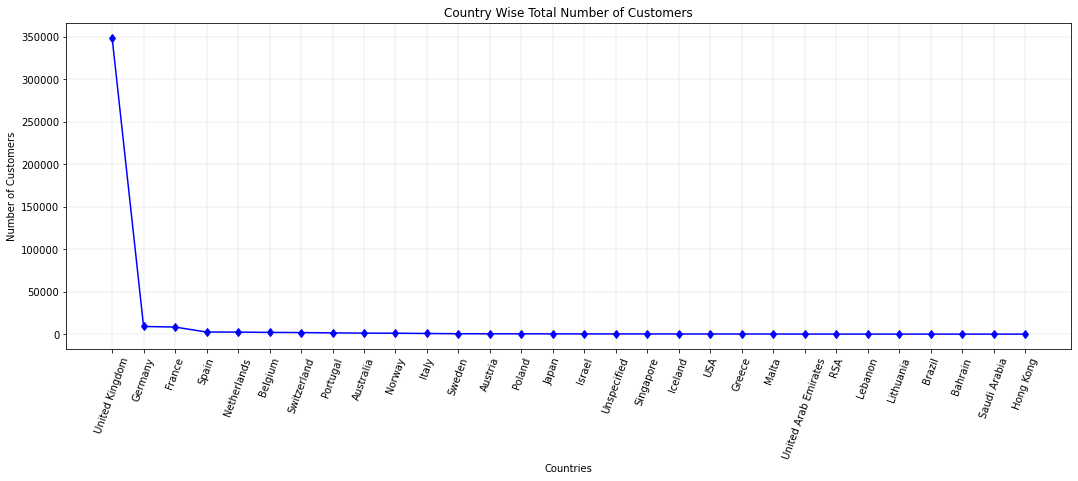

In [39]:
country_wise_customers = df.groupby(['Country'])['CustomerID'].count().sort_values(ascending=False).reset_index()
print(country_wise_customers)

plt.figure(figsize=(18,6))
plt.plot(country_wise_customers['Country'], country_wise_customers['CustomerID'], color='blue', marker='d')
plt.xticks(rotation=70)
plt.grid(linewidth=0.2)
plt.xlabel("Countries")
plt.ylabel("Number of Customers")
plt.title("Country Wise Total Number of Customers")
plt.show()

# Day Wise Data

In [40]:
day_df = df.groupby(['Day'])[['Quantity','Price','Sales']].sum()

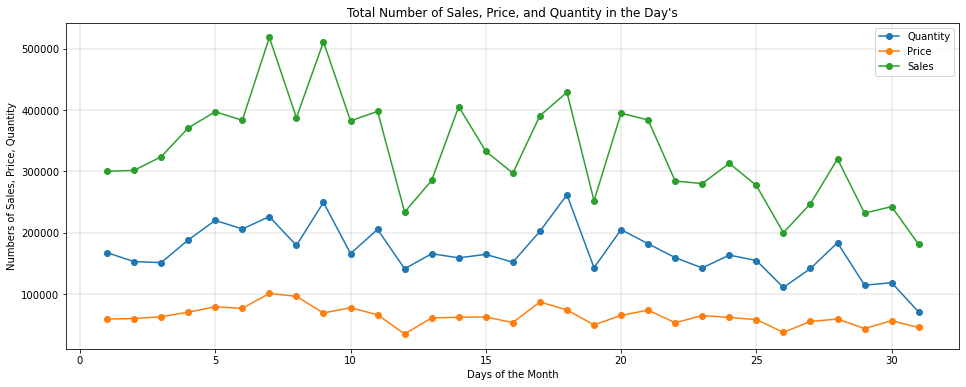

In [41]:
plotdata = pd.DataFrame(day_df)
plotdata.plot(kind='line', figsize=(16,6), marker='o')
plt.grid(linewidth=0.4)
plt.xlabel("Days of the Month")
plt.ylabel("Numbers of Sales, Price, Quantity")
plt.title("Total Number of Sales, Price, and Quantity in the Day's")
plt.show()

# Month Wise Data

       Quantity       Price        Sales
Month                                   
1        378071  127635.110   665727.010
2        270430  104441.340   503060.520
3        340124  137342.000   679471.260
4        296791  113498.791   527214.751
5        376362  146610.420   749008.990
6        331257  132171.200   727311.200
7        370062  138578.091   669497.001
8        404385  112502.120   710819.970
9        530081  168609.282  1006294.612
10       571675  216408.230  1115374.390
11       729486  291600.350  1465421.650
12       653017  295807.870  1436062.700


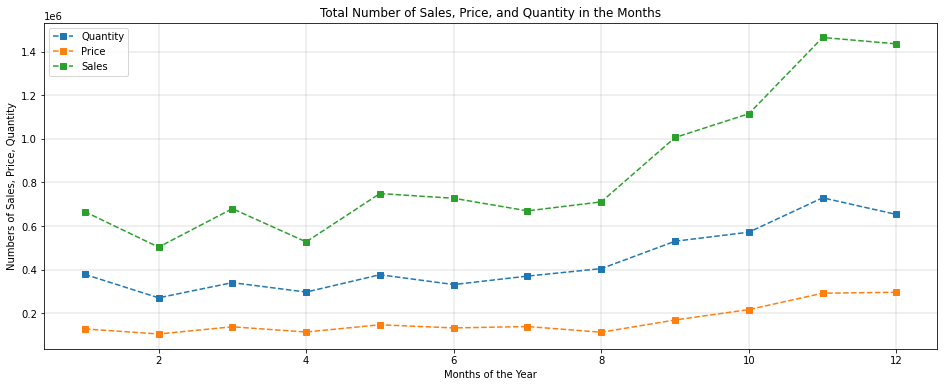

In [42]:
month_df = df.groupby(['Month'])[['Quantity','Price','Sales']].sum()
print(month_df)

plotdata = pd.DataFrame(month_df)
plotdata.plot(kind='line', figsize=(16,6), linestyle='dashed', marker='s')
plt.grid(linewidth=0.4)
plt.xlabel("Months of the Year")
plt.ylabel("Numbers of Sales, Price, Quantity")
plt.title("Total Number of Sales, Price, and Quantity in the Months")
plt.show()

# Year Wise Data

      Quantity        Price        Sales
Year                                    
2010    348445   196276.740   807215.780
2011   4903296  1788928.064  9448048.274


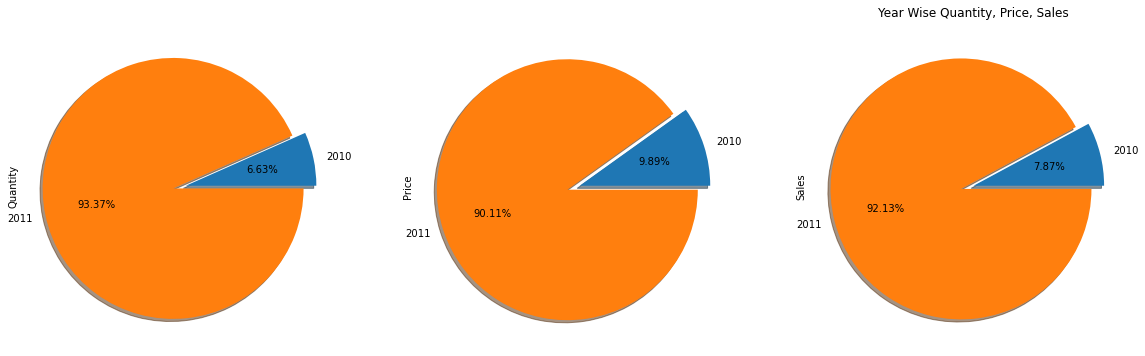

In [43]:
year_df = df.groupby(['Year'])[['Quantity','Price','Sales']].sum()
print(year_df)

year_df[0:2].plot(kind="pie", subplots=True, legend=False, figsize=(20,6), autopct='%2.2F%%', explode=(0,0.1), shadow=True)
plt.title("Year Wise Quantity, Price, Sales")
plt.show()

In [44]:
df.head(2)

,BillNo,Itemname,Quantity,Price,CustomerID,Country,Day,Month,Year,Hour,Minute,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,8,26,15.30
1,536365,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,8,26,20.34


    Hour  CustomerID
0      6           1
1      7         294
2      8        7998
3      9       20869
4     10       36013
5     11       47463
6     12       69302
7     13       62065
8     14       51654
9     15       44321
10    16       23556
11    17       12545
12    18        2871
13    19        3081
14    20         778


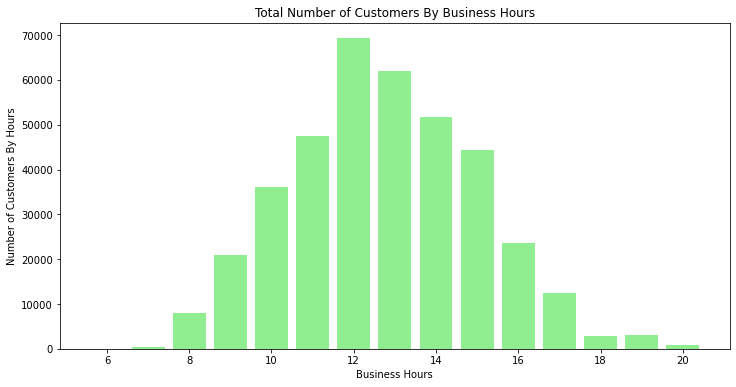

In [45]:
customer_count_hourly = df.groupby(['Hour'])['CustomerID'].count().reset_index()
print(customer_count_hourly)

fig,ax = plt.subplots(figsize=(12,6))
plt.bar(customer_count_hourly['Hour'], customer_count_hourly['CustomerID'], color='lightgreen')
plt.xlabel("Business Hours")
plt.ylabel("Number of Customers By Hours")
plt.title("Total Number of Customers By Business Hours")
plt.show()

In [46]:
customer_qps_hourly = df.groupby(['Hour'])['Quantity','Price','Sales'].sum().reset_index()
print(customer_qps_hourly)

    Hour  Quantity       Price        Sales
0      6         1       4.250        4.250
1      7     11026    1169.580    20674.140
2      8    145527   26278.510   258016.970
3      9    491261  143779.741   946877.921
4     10    736455  185747.821  1381058.051
5     11    636672  198609.060  1204415.900
6     12    811196  235789.450  1395211.860
7     13    679675  237070.940  1235909.560
8     14    558416  230460.221  1089668.671
9     15    604074  334530.060  1319528.310
10    16    318723  229844.650   748746.310
11    17    157564  115342.151   446748.381
12    18     61996   33781.000   144026.640
13    19     29647   10960.950    45544.610
14    20      9508    1836.420    18832.480


C:\Users\mv260\AppData\Local\Temp/ipykernel_11564/2494582193.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_qps_hourly = df.groupby(['Hour'])['Quantity','Price','Sales'].sum().reset_index()


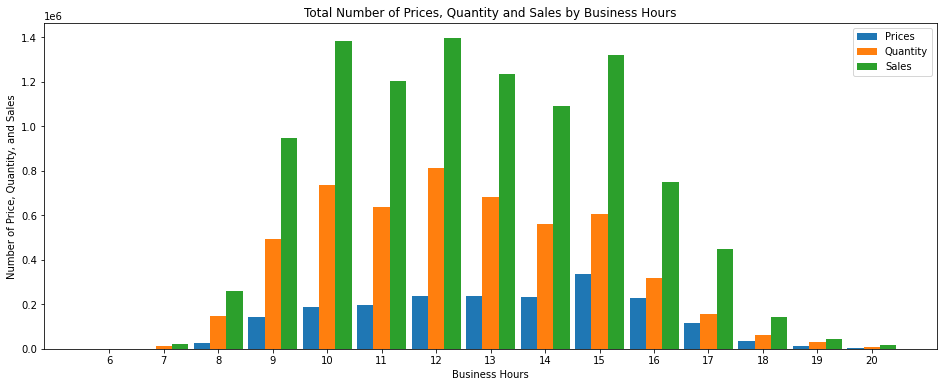

In [47]:
x = customer_qps_hourly['Hour']
prs = customer_qps_hourly['Price']
qty = customer_qps_hourly['Quantity']
sls = customer_qps_hourly['Sales']
w = 0.3

fig,ax = plt.subplots(figsize=(16,6))
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, prs, w, label="Prices")
plt.bar(bar2, qty, w, label="Quantity")
plt.bar(bar3, sls, w, label='Sales')

plt.xlabel("Business Hours")
plt.ylabel("Number of Price, Quantity, and Sales")
plt.title("Total Number of Prices, Quantity and Sales by Business Hours")
plt.xticks(bar1+w, x)
plt.legend()

plt.show()

# Now We will create a dataframe where only actual sales values are presents

In [48]:
actual_sales = df.pivot_table(index=['CustomerID','BillNo','Country','Hour','Day','Month','Year','Itemname'], values=['Quantity','Sales','Price'])

In [49]:
actual_sales.to_csv('actual_sales.csv')